<h1><center><font size="25">Deep Learning para la predicción de series temporales: Redes Neuronales Recurrentes (RNN) y Long Short-Term Memory (LSTM)
</font></center></h1>

<center><b>Fernando Carazo Melo, Joaquín Amat Rodrigo</b></center>

<center><i>Noviembre, 2023</i></center>

Más sobre forecasting en: [**cienciadedatos.net**](https://cienciadedatos.net/forecasting-python)

+ [Skforecast: forecasting series temporales con Python y Scikit Learn](https://www.cienciadedatos.net/documentos/py27-forecasting-series-temporales-python-scikitlearn.html)
+ [Forecasting series temporales con gradient boosting: Skforecast, XGBoost, LightGBM y CatBoost](https://www.cienciadedatos.net/documentos/py39-forecasting-series-temporales-con-skforecast-xgboost-lightgbm-catboost.html)
+ [Predicción (forecasting) de la demanda eléctrica con Python](https://www.cienciadedatos.net/documentos/py29-forecasting-demanda-energia-electrica-python.html)
+ [Predicción (forecasting) de visitas a página web con machine learning](https://www.cienciadedatos.net/documentos/py37-forecasting-visitas-web-machine-learning.html)
+ [Predicción del precio de Bitcoin con Python](https://www.cienciadedatos.net/documentos/py41-forecasting-criptomoneda-bitcoin-machine-learning-python.html)
+ [Intervalos de predicción en modelos de forecasting](https://www.cienciadedatos.net/documentos/py42-intervalos-prediccion-modelos-forecasting-machine-learning.html)
+ [Multi-series forecasting](https://www.cienciadedatos.net/documentos/py44-multi-series-forecasting-skforecast-espa%C3%B1ol.html)
+ [Predicción de demanda intermitente](https://www.cienciadedatos.net/documentos/py48-forecasting-demanda-intermitente.html)

<p align="center"><img src='https://github.com/JoaquinAmatRodrigo/skforecast/raw/master/docs/img/banner-landing-page-skforecast.png'style="width: 600px"></p>

## Introdución


El *Deep Learning* es un campo de la inteligencia artificial enfocado en crear modelos complejos basados en redes neuronales que permiten aprender representaciones no lineales de manera jerárquica. Las redes neuronales recurrentes (RNN) son un tipo de arquitectura en *deep learning* diseñadas para trabajar con datos secuenciales, donde la información se propaga a través de conexiones recurrentes, permitiendo a la red aprender dependencias temporales en los datos.

Este artículo describe cómo entrenar modelos de  *deep learning* -específicamente RNN y LSTM- para la predicción de series temporales (*forecasting*) empleando **Python**, **TensorFlow** y **Skforecast**.

+ [**Keras-TensorFlow**](https://www.tensorflow.org/) proporciona, a traves de su modulo Keras, una interfaz amigable para construir y entrenar modelos de redes neuronales. Gracias a su API de alto nivel, los desarrolladores pueden implementar fácilmente arquitecturas LSTM, aprovechando las ventajas de la eficiencia computacional y la escalabilidad que ofrece el *deep learning*.

+ [**Skforecast**](https://skforecast.org/) permite generalizar de forma sencilla la implementación y uso de modelos de machine learning -entre ellos LSTMs y RNNs- a problemas de forecasting. De esta forma, el usuario puede definir el problema y abstraerse de la arquitectura. Para usuarios avanzados, skforecast también permite ejecutar una arquitectura de Deep Learning previamente definida.

<div class="admonition note" name="html-admonition" style="background: rgba(0,184,212,.1); padding-top: 0px; padding-bottom: 6px; border-radius: 8px; border-left: 8px solid #00b8d4; border-color: #00b8d4; padding-left: 10px;">

<p class="title">
    <i style="font-size: 18px; color:#00b8d4;"></i>
    <b style="color: #00b8d4;">&#9998 Note</b>
</p>

<p>Para comprender plenamente este artículo, se presupone cierto conocimiento sobre redes neuronales y deeplearning. No obstante, si este no es el caso, y mientras trabajamos en la creación de nuevo material, te proporcionamos algunos enlaces de referencia para comenzar:</p>
<ul>
<li><p><a href="https://cienciadedatos.net/documentos/py35-redes-neuronales-python">Introducción a redes neuronales con Python</a></p>
</li>
<li><p><a href="https://d2l.ai/">Dive into Deep Learning</a></p>
</li>
<li><p><a href="https://www.statlearning.com/">An Introduction to Statistical Learning</a></p>
</li>
</ul>
</div>

## Redes Neuronales Recurrentes (RNN)

Las RNN son un tipo de redes neuronales diseñadas para procesar datos que siguen un orden secuencial. En las redes neuronales convencionales, como las redes *feedforward*, la información fluye en una dirección, de la entrada a través de las capas ocultas hasta la salida, sin considerar la estructura secuencial de los datos. En cambio, las RNN mantienen estados internos o memorias, lo que les permite recordar información pasada y utilizarla para comprender y predecir datos futuros en la secuencia.

La unidad básica de una RNN es la célula recurrente. Esta célula toma dos entradas: la entrada actual y el estado oculto previo. El estado oculto puede entenderse como una "memoria" que retiene información de las iteraciones previas. La entrada actual y el estado oculto anterior se combinan para calcular la salida actual y el nuevo estado oculto. Esta salida se utiliza como entrada para la próxima iteración, junto con la siguiente entrada en la secuencia de datos.

A pesar de los avances que se han conseguido con las arquitecturas RNN, tienen limitaciones para capturar patrones a largo plazo. Es por eso que se han desarrollado variantes como las LSTM (Memorias a Corto y Largo Plazo) y las GRU (Unidades Recurrentes Gated), que abordan estos problemas y permiten retener información a largo plazo de manera más efectiva.

<p align="center"><img src='../../images/schema-rnn-model.jpg'style="width: 600px"></p>


<center><font size='2.5'> <i>Diagrama de una red RNN simple. Fuente: James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An introduction to statistical learning (1st ed.) [PDF]. Springer.</i></font></center>


## Long Short-Term Memory (LSTM)

Las redes neuronales Long Short-Term Memory (LSTM) constituyen un tipo especializado de RNNs diseñadas para superar las limitaciones asociados con la captura de dependencias temporales a largo plazo. A diferencia de las RNN tradicionales, las LSTMs incorporan una arquitectura más compleja, introduciendo unidades de memoria y mecanismos de puertas para mejorar la gestión de la información a lo largo del tiempo.

**Estructura de las LSTMs**

Las LSTMs presentan una estructura modular que consta de tres puertas (*gates*) fundamentales: la puerta de olvido (*forget gate*), la puerta de entrada (*input gate*), y la puerta de salida (*output gate*). Estas puertas trabajan en conjunto para regular el flujo de información a través de la unidad de memoria, permitiendo un control más preciso sobre qué información retener y cuál olvidar.

+ **Puerta de Olvido (_Forget Gate_):** Regula cuánta información se debe olvidar y cuánta se mantiene, combinando la entrada actual y la salida anterior mediante una función sigmoide.

+ **Puerta de Entrada (_Input Gate_):** Decide cuánta nueva información debe añadirse a la memoria a largo plazo.

+ **Puerta de Salida (Output Gate):** Determina cuánta información de la memoria actual se utilizará para la salida final, combinando la entrada actual y la información de la memoria mediante una función sigmoide.



<p align="center"><img src='https://databasecamp.de/wp-content/uploads/lstm-architecture-1024x709.png'style="width: 400px"></p>


<center><font size='2.5'> <i>Diagrama de la entradas y dalidas de una LSTM. Fuente: codificandobits https://databasecamp.de/wp-content/uploads/lstm-architecture-1024x709.png.</i></font></center>


## Tipos de problemas de series temporales

La complejidad de un problema de series temporarles suele estar definida por tres factores clave: primero, decidir qué serie o series temporales utilizar para entrenar el modelo; segundo, determinar qué o cuántas series temporales se quieren predecir; y tercero, definir el número de pasos a futuro que se desea predecir. Estos tres aspectos pueden ser un verdadero desafío al abordar problemas de series temporales.

Las redes neuronales recurrentes. gracias a su ámplia variedad de arquitecturas, permiten modelar todos los siguientes encenarios:

+ **Problemas 1:1 - Modelar una única serie y predecir esa misma serie (single-serie, single-output)**
   +  *Descripción:* Este tipo de problemas implica modelar una serie temporal utilizando únicamente su pasado. Es un problema típico autoregresivo.
   + *Ejemplo:* Predicción de la temperatura diaria en base a la temperatura de los últimos días.
<br><br>

+ **Problemas N:1 - Modelar una única serie utilizando múltiples series (multi-series, single-output)**
   - *Descripción:* Se trata de problemas en los que se utilizan varias series temporales para predecir una única serie. Cada serie puede representar una entidad o variable diferente, pero la variable salida es solo una de las series.
   - *Ejemplo:* Predicción de las temperatura diaria en base a multiples series como: temperatura, humedad y presión atmosférica.
<br><br>

+ **Problemas N:M - Modelar múltiples series utilizando múltiples series (multi-series, multiple-outputs)**
   - *Descripción:* Estos problemas consisten en modelar y predecir valores futuros de varias series temporales al mismo tiempo.
   - *Ejemplo:* Pronosticar los valores en bolsa de varias acciones en función del histórico de la bolsa, del precio de la energía y materias primas.
<br><br>

En todos estos encenarios pueden realizarse *single-step forecasting* (un paso a futuro) o *multi-step forecasting* (múltiples pasos a futuro). En el primer caso, el modelo solo predice un único valor a futuro, mientras que en el segundo, el modelo predice múltiples valores a futuro.

En algunas situaciones, puede resultar complicado definir y crear la arquitectura de Deep Learning adecuada para abordar un problema específico. La librería `skforecast` dispone de funcionalidades permite determinar la arquitectura de Tensorflow adecuada para cada problema, simplificando y acelerando el proceso de modelado para variedad de problemas muy amplia. A continuación, se muestra un ejemplo de cómo utilizar `skforecast` para resolver cada uno de los problemas de series temporales descritos utilizando redes neuronales recurrentes.

## Datos

Los datos empleados en este artículo contienen información detallada sobre la calidad del aire en la ciudad de Valencia (España). La colección de datos abarca desde el 1 de enero de 2019 hasta el 31 de diciembre de 2021, proporcionando mediciones horarias de diversos contaminantes atmosféricos, como partículas PM2.5 y PM10, monóxido de carbono (CO), dióxido de nitrógeno (NO2), entre otros. Los datos se han obtenido de plataforma *Red de Vigilancia y Control de la Contaminación Atmosférica, 46250054-València - Centre, https://mediambient.gva.es/es/web/calidad-ambiental/datos-historicos*.

## Librerías

In [17]:
# Install branch Rnn from skforecast

In [1]:
%load_ext autoreload
%autoreload 2

# Data processing
# ==============================================================================
import pandas as pd
import matplotlib.pyplot as plt

# Modelling
# ==============================================================================
from skforecast.ForecasterRnn import ForecasterRnn
from skforecast.ForecasterRnn.utils import create_and_compile_model
from sklearn.preprocessing import MinMaxScaler
from skforecast.model_selection_multiseries import backtesting_forecaster_multiseries


# Tensorflow and Keras
# ==============================================================================
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping

2023-12-05 23:19:25.798452: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/fernandocarazo/opt/miniconda3/envs/skforecast_10_py11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
# Descarga y procesado de datos
# ==============================================================================
#data = fetch_dataset(name="air_quality_valencia")


In [20]:
# Imputación de datos ausentes mediante interpolación
# ==============================================================================
# data = data.asfreq("H").interpolate(method="linear")
# data = data.sort_index()



Se verifica que el conjunto de datos tiene un índice de tipo `DatetimeIndex` y con frecuencia horaria. Si bien no es necesario que los datos tengan este tipo de índice para utilizar skforecast, es más ventajoso para el posterior uso de las predicciones.


In [21]:
# Comprobación de índice y frecuencia
# ==============================================================================
# print(f"Tipo de índice: {data.index.dtype}")
# print(f"Frecuencia: {data.index.freq}")

In [22]:
# Descarga y procesado
# ==============================================================================
url = "https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast-datasets/main/data/air_quality_valencia.csv"
data = pd.read_csv(url)
data["datetime"] = pd.to_datetime(data["datetime"], format="%Y-%m-%d %H:%M:%S")
data = data.set_index("datetime")
print(data.index.to_series().diff().dt.total_seconds().value_counts())
print(data.shape)

# -- Interpolación utilizando el valor medio entre los dos valores contiguos - #
data = data.asfreq("H").interpolate(method="linear")
data = data.sort_index()
print(data.index.to_series().diff().dt.total_seconds().value_counts())

datetime
 3600.0        26075
 7200.0           25
 10800.0          20
 18000.0           3
 14400.0           2
 259200.0          1
-94690800.0        1
 79200.0           1
Name: count, dtype: int64
(26129, 10)
datetime
3600.0    26303
Name: count, dtype: int64


Para facilitar el entrenamiento de los modelos, la búsqueda de hiperparámetros óptimos y la evaluación de su capacidad predictiva, los datos se dividen en tres conjuntos separados: entrenamiento, validación y test.

In [23]:
# Split train-validation-test
# ==============================================================================
end_train = "2021-03-31 23:59:00"
end_validation = "2021-09-30 23:59:00"
data_train = data.loc[:end_train, :].copy()
data_val = data.loc[end_train:end_validation, :].copy()
data_test = data.loc[end_validation:, :].copy()

print(f"Dates train      : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Dates validacion : {data_val.index.min()} --- {data_val.index.max()}  (n={len(data_val)})")
print(f"Dates test       : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

Dates train      : 2019-01-01 00:00:00 --- 2021-03-31 23:00:00  (n=19704)
Dates validacion : 2021-04-01 00:00:00 --- 2021-09-30 23:00:00  (n=4392)
Dates test       : 2021-10-01 00:00:00 --- 2021-12-31 23:00:00  (n=2208)


In [24]:
# Datos
# ==============================================================================
data_train.head()

,pm2.5,co,no,no2,pm10,nox,o3,veloc.,direc.,so2
datetime,,,,,,,,,,
2019-01-01 00:00:00,19.0,0.2,3.0,36.0,22.0,40.0,16.0,0.5,262.0,8.0
2019-01-01 01:00:00,26.0,0.1,2.0,40.0,32.0,44.0,6.0,0.6,248.0,8.0
2019-01-01 02:00:00,31.0,0.1,11.0,42.0,36.0,58.0,3.0,0.3,224.0,8.0
2019-01-01 03:00:00,30.0,0.1,15.0,41.0,35.0,63.0,3.0,0.2,220.0,10.0
2019-01-01 04:00:00,30.0,0.1,16.0,39.0,36.0,63.0,3.0,0.4,221.0,11.0


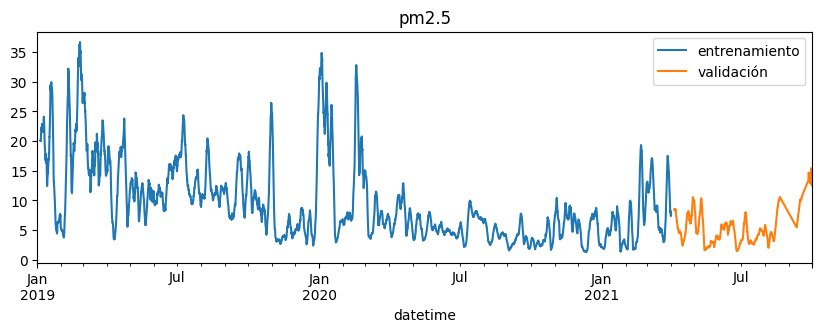

In [25]:
# Graficado de una variables
# ==============================================================================
variable = "pm2.5"
fig, ax = plt.subplots(figsize=(10, 3))
# title
ax.set_title(variable)
data_train[[variable]].rolling(100).mean().plot(ax=ax, label="train")
data_val[[variable]].rolling(100).mean().plot(ax=ax, label="val")
ax.legend(["entrenamiento", "validación"])
plt.show()

## Modelo LSTM y ForecasterRnn

TODO: Completar esta intro.

El priemr paso es.... crear el modelo LSTM.... Si bien tensorflow-keras facilita el proceso de crear arquitecturas de deep learning, no siempre es evidente las dimensiones que debe tener un modelo LSTM para forecasting ya que estas dependen de cuantas series temporales se estén modelando, cuantas prediciendo y la longitud del horicento de predicción. 

Para tratar de mejorar la experiencia del usuario y acelerar el proceso de propotipado y desarollo, skforecast dispone de la función `create_and_compile_model`, con la que, con apenas unos pocos argumentos, se infiere la arquitectura y se crea el modelo. 

+ series: Series temporales que se utilizarán para entrenar el modelo

+ levels: Series temporales que se quieren predecir

+ lags: Número de pasos de tiempo que se utilizarán para predecir el siguiente valor.

+ steps: Número de pasos de tiempo que se quieren predecir.

+ recurrent_layer: Tipo de capa recurrente a utilizar. Por defecto, se utiliza una capa LSTM.

+ recurrent_units: Número de unidades de la capa recurrente. Por defecto, se utiliza 100. Si se pasa una lista, se creará una capa recurrente por cada elemento de la lista.

+ dense_units: Número de unidades de la capa densa. Por defecto, se utiliza 64. Si se pasa una lista, se creará una capa densa por cada elemento de la lista.

+ optimizer: Optimizador a utilizar. Por defecto, se utiliza Adam con learning rate de 0.01.

+ loss: Función de pérdida a utilizar. Por defecto, se utiliza Mean Squared Error.


<div class="admonition note" name="html-admonition" style="background: rgba(0,184,212,.1); padding-top: 0px; padding-bottom: 6px; border-radius: 8px; border-left: 8px solid #00b8d4; border-color: #00b8d4; padding-left: 10px;">

<p class="title">
    <i style="font-size: 18px; color:#00b8d4;"></i>
    <b style="color: #00b8d4;">&#9998 Note</b>
</p>

La función <code>create_and_compile_model</code> está pensada para facilitar la creación del modelo Tensorflow, sinembargo, usuarios más abanzados pueden crear sus propias arquitecturas siempre y cuado las dimensiones de entrada y salida coincidan con el caso de uso al que se va a aplicar el modelo.

</div>

Una vez que el modelo se ha creado y compilado, el siguiente paso es crear una instancia del [ForecasterRnn](). Esta clase se encarga de añadir al modelo de deep learning, todas las funcionalidades necesarias para que pueda utilizarse en problemas de forecasting. Además es compatible con el resto de funcionalidades que ofrece skforecast (validación backtesting y busqueda de hiperparámetros).

## Problema 1:1 - Modelar una única serie


En este priemr escenario, se desea predecir la concentracion de O3 de los próximos 5 días utilizxando únciamente sus datos históricos. Se trata por lo tanto de un escenario en el que una única serie temporal se modela utilizando únicamente sus valores pasados.

In [76]:
# Creación del modelo
# ==============================================================================
series = ["o3"] # Series temporales que se utilizarán para entrenar el modelo. Tiene que incluir la serie a predecir.
levels = ["o3"] # Características a predecir. Pueden ser todas las serires o menos
lags = 32 # Elementos temporales que permitimos que influyan en la predicción
steps = 2 # Pasos a futuro a predecir

data_train_sel = data_train[series].copy()
data_val_sel = data_val[series].copy()
data_test_sel = data_test[series].copy()

model = create_and_compile_model(
    series=data_train_sel,
    levels=levels, 
    lags=lags,
    steps=steps,
    recurrent_layer="LSTM",
    recurrent_units=100,
    dense_units=50,
    optimizer=Adam(learning_rate=0.01), 
    loss=MeanSquaredError()
)
model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 32, 1)]           0         
                                                                 
 lstm_17 (LSTM)              (None, 100)               40800     
                                                                 
 dense_28 (Dense)            (None, 50)                5050      
                                                                 
 dense_29 (Dense)            (None, 2)                 102       
                                                                 
 reshape_13 (Reshape)        (None, 2, 1)              0         
                                                                 
Total params: 45952 (179.50 KB)
Trainable params: 45952 (179.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Una vez que el modelo se ha creado y compilado, el siguiente paso es crear una instancia del [ForecasterRnn](). Esta clase se encarga de añadir al modelo de regresión, todas las funcionalidades necesarias para  que pueda utilizarse en problemas de forecasting. Además es compatible con el resto de funcionalidades que ofrece skforecast.

In [77]:
# Creación del Forecaster
# ==============================================================================
forecaster = ForecasterRnn(
    regressor=model,
    levels=levels,
    transformer_series=MinMaxScaler(),
    fit_kwargs={
        "epochs": 10,  # Número de épocas para entrenar el modelo.
        "batch_size": 128,  # Tamaño del batch para entrenar el modelo.
        "callbacks": [
            EarlyStopping(monitor="val_loss", patience=10)
        ],  # Callback para detener el entrenamiento cuando ya no esté aprendiendo más.
        "series_val": data_val_sel,  # Datos de validación para el entrenamiento del modelo.
    },
)

/Users/fernandocarazo/Documents/git-repos/skforecast/skforecast/ForecasterRnn/ForecasterRnn.py:226: UserWarning: Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.
  warnings.warn(f"Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.")
/Users/fernandocarazo/Documents/git-repos/skforecast/skforecast/ForecasterRnn/ForecasterRnn.py:243: UserWarning: `steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.
  warnings.warn(f"`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.")


In [78]:
# Entrenamiento del Modelo
# ==============================================================================
forecaster.fit(data_train_sel)

Epoch 1/10
154/154 [==============================] - 14s 54ms/step - loss: 0.0506 - val_loss: 0.0201
Epoch 2/10
154/154 [==============================] - 8s 53ms/step - loss: 0.0157 - val_loss: 0.0141
Epoch 3/10
154/154 [==============================] - 8s 52ms/step - loss: 0.0116 - val_loss: 0.0103
Epoch 4/10
154/154 [==============================] - 8s 52ms/step - loss: 0.0094 - val_loss: 0.0089
Epoch 5/10
154/154 [==============================] - 9s 60ms/step - loss: 0.0084 - val_loss: 0.0083
Epoch 6/10
154/154 [==============================] - 9s 59ms/step - loss: 0.0082 - val_loss: 0.0078
Epoch 7/10
154/154 [==============================] - 10s 64ms/step - loss: 0.0078 - val_loss: 0.0080
Epoch 8/10
154/154 [==============================] - 8s 55ms/step - loss: 0.0076 - val_loss: 0.0078
Epoch 9/10
154/154 [==============================] - 9s 61ms/step - loss: 0.0074 - val_loss: 0.0108
Epoch 10/10
154/154 [==============================] - 8s 52ms/step - loss: 0.0073 - val_

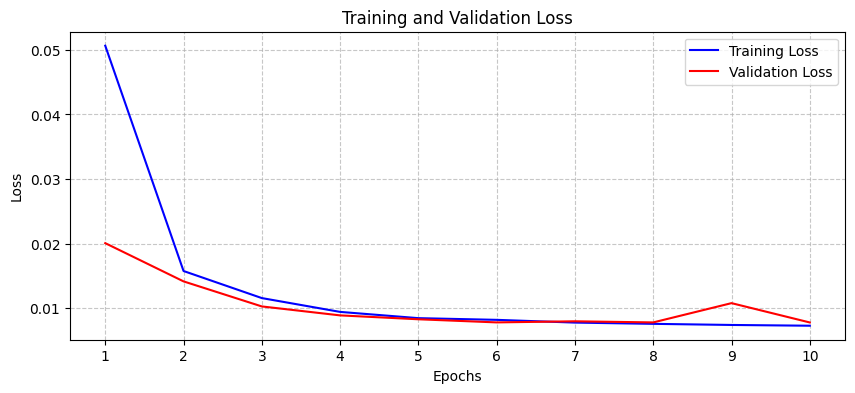

In [79]:
# Seguimiento del entrenamiento y overfitting
# ==============================================================================

forecaster.plot_history()

In [80]:
# Predicción
# ==============================================================================
predictions = forecaster.predict()
predictions

,o3
2021-04-01 00:00:00,78.933876
2021-04-01 01:00:00,75.931534


In [81]:
# ------ También se puede predecir unos steps en particular ------ #
forecaster.predict(steps=[1, 5])

ValueError: The maximum value of `steps` must be less than or equal to the value of steps defined when initializing the forecaster. Got 5, but the maximum is 2.

<Figure size 1200x300 with 0 Axes>

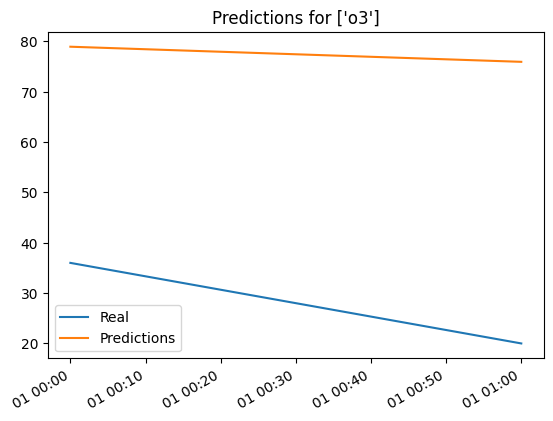

In [82]:
# Graficado de las predicciones
# ==============================================================================
if len(levels) == 1:
    fig = plt.figure(figsize=(12,3))
    data_val.loc[predictions.index, levels].plot(label="Real")
    predictions[levels].squeeze().plot(label="Predictions")
    plt.title(f"Predictions for {levels}")
    plt.legend(["Real", "Predictions"])
    plt.show()
else:
    fig, ax = plt.subplots(nrows=len(levels), figsize=(12, 3 * len(levels)))
    for i, ll in enumerate(levels):
        ax[i].set_title(f"Predictions for {ll}")
        data_val.loc[predictions.index, ll].plot(ax=ax[i], label="Real")
        predictions[ll].squeeze().plot(ax=ax[i], label="Predictions")
    fig.legend(["Real", "Predictions"])
    plt.show()

!!!!!!!Hablar del backtesting

In [84]:
# Backtesting multiserie
# ==============================================================================
metrics, predictions = backtesting_forecaster_multiseries(
    forecaster=forecaster,
    steps=forecaster.max_step,
    series=data_train_sel,
    levels=forecaster.levels,
    initial_train_size=int(len(data_train_sel) * 0.95),
    metric="mean_squared_error",
    verbose=True,
    refit=False,
)

Epoch 1/10
146/146 [==============================] - 9s 53ms/step - loss: 0.0073 - val_loss: 0.0086
Epoch 2/10
146/146 [==============================] - 7s 49ms/step - loss: 0.0072 - val_loss: 0.0081
Epoch 3/10
146/146 [==============================] - 8s 53ms/step - loss: 0.0072 - val_loss: 0.0074
Epoch 4/10
146/146 [==============================] - 8s 52ms/step - loss: 0.0074 - val_loss: 0.0107
Epoch 5/10
146/146 [==============================] - 8s 52ms/step - loss: 0.0073 - val_loss: 0.0073
Epoch 6/10
146/146 [==============================] - 8s 55ms/step - loss: 0.0072 - val_loss: 0.0075
Epoch 7/10
146/146 [==============================] - 8s 52ms/step - loss: 0.0072 - val_loss: 0.0073
Epoch 8/10
146/146 [==============================] - 9s 64ms/step - loss: 0.0071 - val_loss: 0.0076
Epoch 9/10
146/146 [==============================] - 9s 62ms/step - loss: 0.0070 - val_loss: 0.0075
Epoch 10/10
146/146 [==============================] - 9s 59ms/step - loss: 0.0072 - val_lo

100%|██████████| 493/493 [00:42<00:00, 11.47it/s]


In [85]:
# Predicciones de backtesting
# ==============================================================================
predictions

,o3
2021-02-18 22:00:00,63.104908
2021-02-18 23:00:00,57.165119
2021-02-19 00:00:00,71.607040
2021-02-19 01:00:00,67.876465
2021-02-19 02:00:00,68.925888
...,...
2021-03-31 19:00:00,41.532940
2021-03-31 20:00:00,75.233131
2021-03-31 21:00:00,69.372437
2021-03-31 22:00:00,88.521011


Text(0.5, 1.0, 'Backtesting predictions for o3')

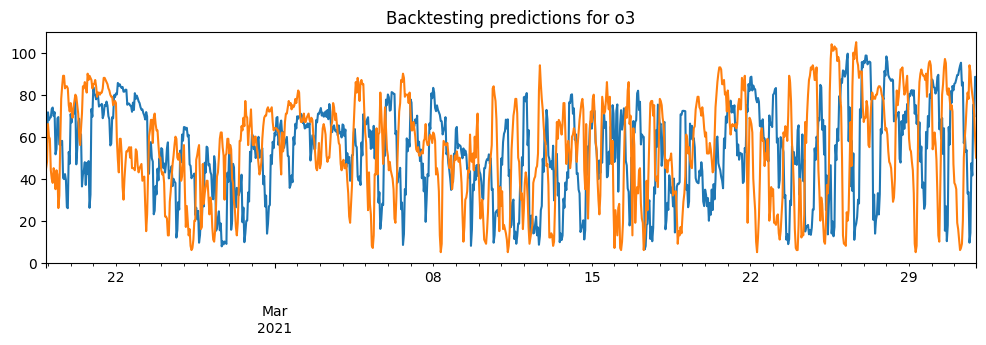

In [86]:
# Graficado de las predicciones
# ==============================================================================
plt.figure(figsize=(12, 3))
predictions["o3"].plot()
data_train_sel.loc[predictions.index, "o3"].plot()
plt.title("Backtesting predictions for o3")

In [4]:
look_back = 1


Epoch 1/100
94/94 - 2s - loss: 0.0413 - 2s/epoch - 23ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0201 - 129ms/epoch - 1ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0152 - 124ms/epoch - 1ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0140 - 127ms/epoch - 1ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0130 - 138ms/epoch - 1ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0118 - 128ms/epoch - 1ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0108 - 128ms/epoch - 1ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0097 - 130ms/epoch - 1ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0089 - 133ms/epoch - 1ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0078 - 132ms/epoch - 1ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0069 - 145ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0059 - 217ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0052 - 170ms/epoch - 2ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0045 - 133ms/epoch - 1ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0038 - 129ms/epoch - 1ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0034 - 135ms/epoc

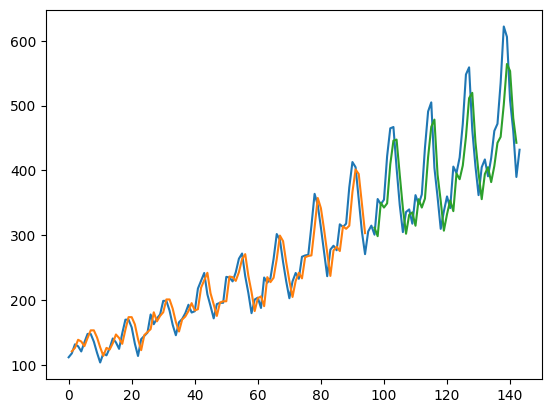

In [5]:
# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [6]:
data_train_sel, data_test_sel = dataframe.iloc[0:train_size,:], dataframe.iloc[train_size:len(dataset),:]

<Axes: >

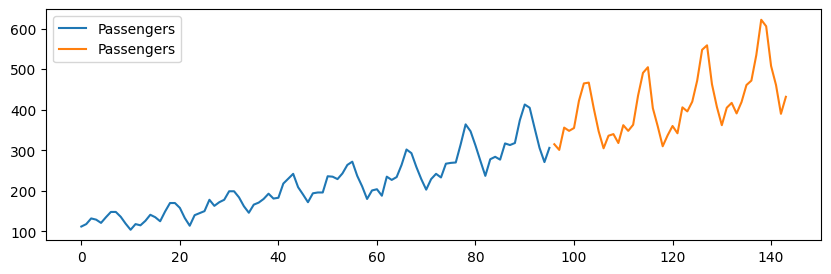

In [7]:
fig, ax = plt.subplots(figsize=(10, 3))
data_train_sel.plot(ax=ax)
data_test_sel.plot(ax=ax)

In [216]:
lags = 1
steps = 1
# model = create_and_compile_model(
#     series=data_train_sel,
#     levels="Passengers", 
#     lags=lags,
#     steps=steps,
#     recurrent_layer="LSTM",
#     recurrent_units=4,
#     dense_units=1,
#     optimizer=Adam(learning_rate=0.01), 
#     loss=MeanSquaredError()
# )
# model.summary()

model = Sequential()
model.add(LSTM(4, input_shape=(1, lags)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


# Creación del Forecaster
# ==============================================================================
forecaster = ForecasterRnn(
    regressor=model,
    steps=steps,
    lags=lags,
    levels="Passengers",
    transformer_series=MinMaxScaler(),
    fit_kwargs={
        "epochs": 100,  # Número de épocas para entrenar el modelo.
    },
)

forecaster.fit(data_train_sel)

# # https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
# # Backtesting multiserie
# # ==============================================================================
# metrics, predictions = backtesting_forecaster_multiseries(
#     forecaster=forecaster,
#     steps=forecaster.max_step,
#     series=data_train_sel,
#     levels=forecaster.levels,
#     initial_train_size=int(len(data_train_sel) * 0.2),
#     metric="mean_squared_error",
#     verbose=False,
#     refit=False,
# )


# # Graficado de las predicciones
# # ==============================================================================
# plt.figure(figsize=(12, 3))
# predictions.shift(-1)["Passengers"].plot()
# dataframe.loc[predictions.index, "Passengers"].plot()
# plt.title("Backtesting predictions for Passengers")
# plt.legend(["Predictions", "Real"])

TypeError: 'NoneType' object is not subscriptable

In [214]:
forecaster.predict(steps=1)

,Passengers
96,214.880203


In [210]:
X_train, y_train, _ = forecaster.create_train_X_y(data_train_sel)

In [213]:
x_preds = forecaster.regressor.predict(X_train)
x_preds = forecaster.transformer_series_["Passengers"].inverse_transform(x_preds.reshape(-1, 1))
x_preds

3/3 [==============================] - 0s 2ms/step


array([[214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.8802],
       [214.

In [207]:
x_preds

array([0.3588356, 0.3588356, 0.3588356, 0.3588356, 0.3588356, 0.3588356,
       0.3588356, 0.3588356, 0.3588356, 0.3588356, 0.3588356, 0.3588356,
       0.3588356, 0.3588356, 0.3588356, 0.3588356, 0.3588356, 0.3588356,
       0.3588356, 0.3588356, 0.3588356, 0.3588356, 0.3588356, 0.3588356,
       0.3588356, 0.3588356, 0.3588356, 0.3588356, 0.3588356, 0.3588356,
       0.3588356, 0.3588356, 0.3588356, 0.3588356, 0.3588356, 0.3588356,
       0.3588356, 0.3588356, 0.3588356, 0.3588356, 0.3588356, 0.3588356,
       0.3588356, 0.3588356, 0.3588356, 0.3588356, 0.3588356, 0.3588356,
       0.3588356, 0.3588356, 0.3588356, 0.3588356, 0.3588356, 0.3588356,
       0.3588356, 0.3588356, 0.3588356, 0.3588356, 0.3588356, 0.3588356,
       0.3588356, 0.3588356, 0.3588356, 0.3588356, 0.3588356, 0.3588356,
       0.3588356, 0.3588356, 0.3588356, 0.3588356, 0.3588356, 0.3588356,
       0.3588356, 0.3588356, 0.3588356, 0.3588356, 0.3588356, 0.3588356,
       0.3588356, 0.3588356, 0.3588356, 0.3588356, 

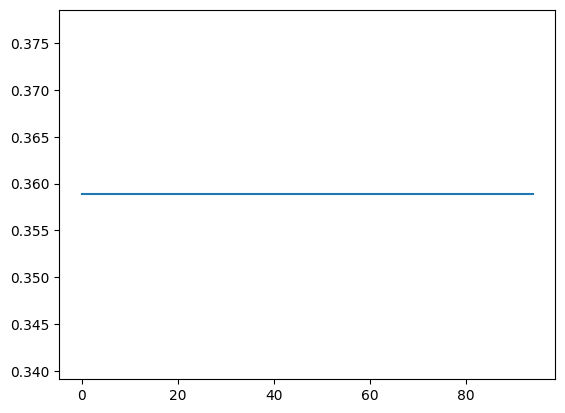

In [202]:
# Tiene dimension (95, 1, 1), pero quiero que tenga dimension (95, 1)
x_preds = x_preds.squeeze()
# plot
plt.plot(x_preds)


KeyboardInterrupt



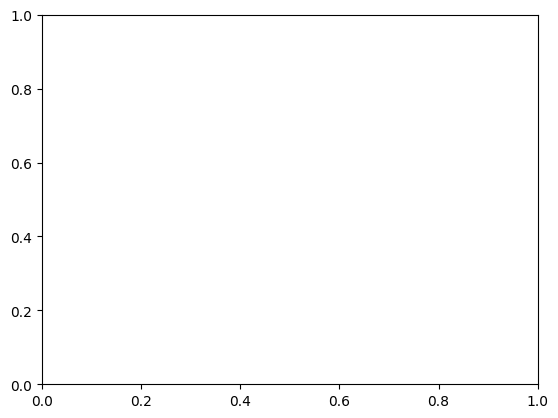

In [200]:
plt.plot(x_preds)

3/3 [==============================] - 0s 2ms/step


<Axes: >

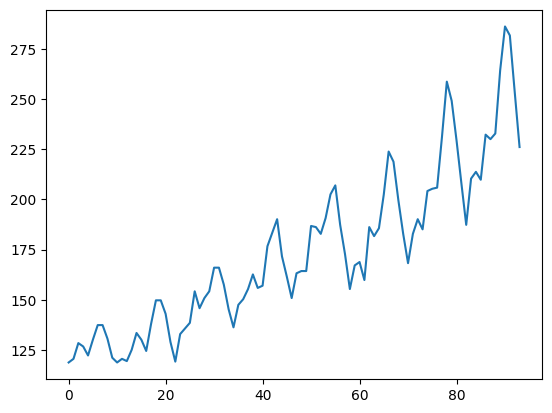

In [191]:
predictions_train = forecaster.regressor.predict(trainX)

# it has a dimension of (96,1,1) and we need to reshape it to (96,1)
predictions_train = predictions_train.reshape(predictions_train.shape[0], predictions_train.shape[2])
predictions_train = forecaster.transformer_series_["Passengers"].inverse_transform(predictions_train)
predictions_train = pd.Series(predictions_train[:,0])
predictions_train.plot()    

# real
trainYr = trainY.reshape(trainY.shape[1], trainY.shape[0])
trainYr = pd.Series(trainYr[:,0])
trainYr.plot()

In [ ]:
# Métricas de error de backtesting
# ==============================================================================
metrics

,levels,mean_squared_error
0,o3,825.413424


## Problemas N:1 - Series temporales múltiples con salida única (multi-series, single-output)


In [87]:
# Creación del modelo
# ==============================================================================
series = ['pm2.5', 'co', 'no', 'no2', 'pm10', 'nox', 'o3', 'veloc.', 'direc.','so2'] # Series temporales que se utilizarán para entrenar el modelo. Tiene que incluir la serie a predecir.
levels = ["o3"] # Características a predecir. Pueden ser todas las serires o menos
lags = 64 # Elementos temporales que permitimos que influyan en la predicción
steps = 5 # Pasos a futuro a predecir

data_train_sel = data_train[series].copy()
data_val_sel = data_val[series].copy()
data_test_sel = data_test[series].copy()

model = create_and_compile_model(
    series=data_train_sel,
    levels=levels, 
    lags=lags,
    steps=steps,
    recurrent_layer="LSTM",
    recurrent_units=[100, 50],
    dense_units=[64, 32],
    optimizer=Adam(learning_rate=0.01), 
    loss=MeanSquaredError()
)
model.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 64, 10)]          0         
                                                                 
 lstm_18 (LSTM)              (None, 64, 100)           44400     
                                                                 
 lstm_19 (LSTM)              (None, 50)                30200     
                                                                 
 dense_30 (Dense)            (None, 64)                3264      
                                                                 
 dense_31 (Dense)            (None, 32)                2080      
                                                                 
 dense_32 (Dense)            (None, 5)                 165       
                                                                 
 reshape_14 (Reshape)        (None, 5, 1)              0  

Una vez que el modelo se ha creado y compilado, el siguiente paso es crear una instancia del [ForecasterRnn](). Esta clase se encarga de añadir al modelo de regresión, todas las funcionalidades necesarias para  que pueda utilizarse en problemas de forecasting. Además es compatible con el resto de funcionalidades que ofrece skforecast.

In [88]:
# Creación del Forecaster
# ==============================================================================
forecaster = ForecasterRnn(
    regressor=model,
    levels=levels,
    transformer_series=MinMaxScaler(),
    fit_kwargs={
        "epochs": 20,  # Número de épocas para entrenar el modelo.
        "batch_size": 128,  # Tamaño del batch para entrenar el modelo.
        "callbacks": [
            EarlyStopping(monitor="val_loss", patience=5)
        ],  # Callback para detener el entrenamiento cuando ya no esté aprendiendo más.
        "series_val": data_val_sel,  # Datos de validación para el entrenamiento del modelo.
    },
)

/Users/fernandocarazo/Documents/git-repos/skforecast/skforecast/ForecasterRnn/ForecasterRnn.py:226: UserWarning: Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.
  warnings.warn(f"Setting `lags` = 'auto'. `lags` are inferred from the regressor architecture. Avoid the warning with lags=lags.")
/Users/fernandocarazo/Documents/git-repos/skforecast/skforecast/ForecasterRnn/ForecasterRnn.py:243: UserWarning: `steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.
  warnings.warn(f"`steps` default value = 'auto'. `steps` inferred from regressor architecture. Avoid the warning with steps=steps.")


In [89]:
# Entrenamiento del Modelo
# ==============================================================================
forecaster.fit(data_train_sel)

Epoch 1/20
154/154 [==============================] - 23s 127ms/step - loss: 0.0783 - val_loss: 0.0324
Epoch 2/20
154/154 [==============================] - 21s 135ms/step - loss: 0.0326 - val_loss: 0.0459
Epoch 3/20
154/154 [==============================] - 25s 163ms/step - loss: 0.0342 - val_loss: 0.0373
Epoch 4/20
154/154 [==============================] - 96s 629ms/step - loss: 0.0278 - val_loss: 0.0242
Epoch 5/20
154/154 [==============================] - 16s 101ms/step - loss: 38961.7812 - val_loss: 0.0582
Epoch 6/20
154/154 [==============================] - 48s 310ms/step - loss: 0.0535 - val_loss: 0.0541
Epoch 7/20
154/154 [==============================] - 21s 133ms/step - loss: 0.0503 - val_loss: 0.0507
Epoch 8/20
154/154 [==============================] - 19s 123ms/step - loss: 0.0476 - val_loss: 0.0478
Epoch 9/20
154/154 [==============================] - 33s 213ms/step - loss: 0.0456 - val_loss: 0.0454


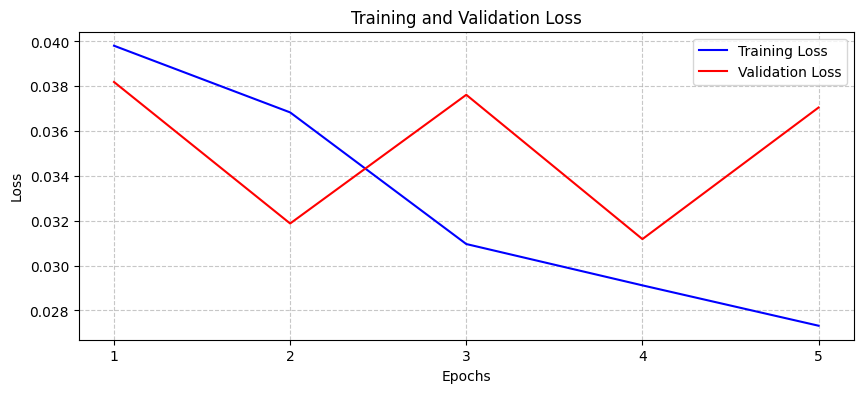

In [53]:
# Seguimiento del entrenamiento y overfitting
# ==============================================================================
forecaster.plot_history()

In [54]:
# Predicción
# ==============================================================================
predictions = forecaster.predict()
predictions

,o3
2021-04-01 00:00:00,43.216312
2021-04-01 01:00:00,45.588360
2021-04-01 02:00:00,46.726891
2021-04-01 03:00:00,48.359882
2021-04-01 04:00:00,48.164383


! Explicar como evitar el reentrenamiento en el backtesting. Los modelos de deep learning conviene hacer un fit inicial para ver la convergencia pero luego no es necesario volver a entrenarlos en el backtesting.

In [57]:
# Backtesting multiserie
# ==============================================================================
metrics, predictions = backtesting_forecaster_multiseries(
    forecaster=forecaster,
    steps=forecaster.steps,
    series=data_train_sel,
    levels=forecaster.levels,
    initial_train_size=int(len(data_train_sel) * 0.95),
    metric="mean_squared_error",
    verbose=False,
    refit=False,
)

Epoch 1/5
146/146 [==============================] - 27s 166ms/step - loss: 0.0263 - val_loss: 0.0306
Epoch 2/5
146/146 [==============================] - 23s 157ms/step - loss: 0.0259 - val_loss: 0.0366
Epoch 3/5
146/146 [==============================] - 23s 159ms/step - loss: 0.0258 - val_loss: 0.0279
Epoch 4/5
146/146 [==============================] - 24s 163ms/step - loss: 0.0244 - val_loss: 0.0245
Epoch 5/5
146/146 [==============================] - 28s 191ms/step - loss: 0.0242 - val_loss: 0.0283
Information of backtesting process
----------------------------------
Number of observations used for initial training: 18718
Number of observations used for backtesting: 986
    Number of folds: 198
    Number of steps per fold: 5
    Number of steps to exclude from the end of each train set before test (gap): 0
    Last fold only includes 1 observations.

Fold: 0
    Training:   2019-01-01 00:00:00 -- 2021-02-18 21:00:00  (n=18718)
    Validation: 2021-02-18 22:00:00 -- 2021-02-19 02

100%|██████████| 198/198 [00:21<00:00,  9.20it/s]


In [58]:
# Métricas de error de backtesting
# ==============================================================================
metrics

,levels,mean_squared_error
0,o3,881.287224


In [59]:
# Predicciones de backtesting
# ==============================================================================
predictions

,o3
2021-02-18 22:00:00,17.244293
2021-02-18 23:00:00,21.053600
2021-02-19 00:00:00,23.206947
2021-02-19 01:00:00,24.926037
2021-02-19 02:00:00,27.237215
...,...
2021-03-31 19:00:00,37.497787
2021-03-31 20:00:00,39.730019
2021-03-31 21:00:00,41.260986
2021-03-31 22:00:00,42.620819


Text(0.5, 1.0, 'Backtesting predictions for o3')

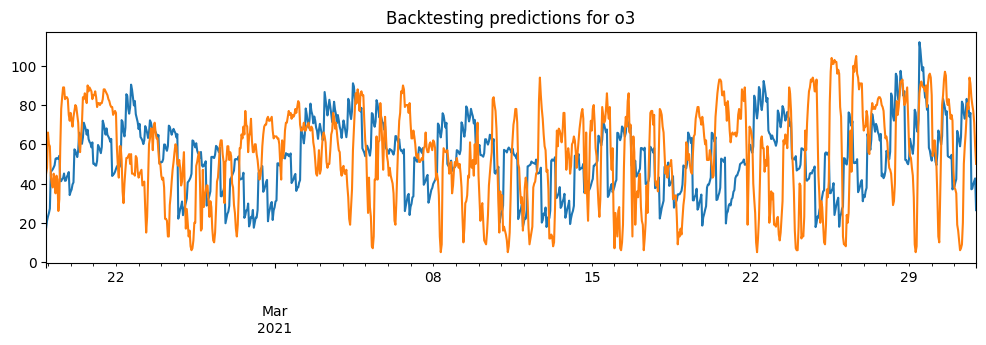

In [60]:
# Graficado de las predicciones
# ==============================================================================
plt.figure(figsize=(12, 3))
predictions["o3"].plot()
data_train_sel.loc[predictions.index, "o3"].plot()
plt.title("Backtesting predictions for o3")

Seguramente se reduce el error, de ser así explicar que modelar varias series a la vez permite que el modelo aprenda mejor las relaciones entre las series.

## Problemas N:M - Series temporales múltiples con salidas múltiples (multi-series, multiple-outputs)

In [61]:
# Creación del modelo
# ==============================================================================
series = ['pm2.5', 'co', 'no', 'no2', 'pm10', 'nox', 'o3', 'veloc.', 'direc.','so2'] 
levels = ['pm2.5', 'co', 'no', "o3"]
# levels: Características a predecir. Pueden ser todas las serires o menos
lags = 64 # Elementos temporales que permitimos que influyan en la predicción
steps = 5 # Pasos a futuro a predecir

data_train_sel = data_train[series].copy()
data_val_sel = data_val[series].copy()
data_test_sel = data_test[series].copy()

model = create_and_compile_model(
    series=data_train_sel,
    levels=levels, 
    lags=lags,
    steps=steps,
    recurrent_layer="LSTM",
    recurrent_units=[50],
    dense_units=[32],
    optimizer=Adam(learning_rate=0.01), 
    loss=MeanSquaredError()
)
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 64, 10)]          0         
                                                                 
 lstm_8 (LSTM)               (None, 50)                12200     
                                                                 
 dense_15 (Dense)            (None, 32)                1632      
                                                                 
 dense_16 (Dense)            (None, 20)                660       
                                                                 
 reshape_7 (Reshape)         (None, 5, 4)              0         
                                                                 
Total params: 14492 (56.61 KB)
Trainable params: 14492 (56.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Una vez que el modelo se ha creado y compilado, el siguiente paso es crear una instancia del [ForecasterRnn](). Esta clase se encarga de añadir al modelo de regresión, todas las funcionalidades necesarias para  que pueda utilizarse en problemas de forecasting. Además es compatible con el resto de funcionalidades que ofrece skforecast.

In [62]:
# Creación del Forecaster
# ==============================================================================

forecaster = ForecasterRnn(
    regressor=model,
    levels=levels,
    transformer_series=MinMaxScaler(),
    fit_kwargs={
        "epochs": 2,  # Número de épocas para entrenar el modelo.
        "batch_size": 128,  # Tamaño del batch para entrenar el modelo.
        "callbacks": [
            EarlyStopping(monitor="val_loss", patience=5)
        ],  # Callback para detener el entrenamiento cuando ya no esté aprendiendo más.
        "series_val": data_val_sel,  # Datos de validación para el entrenamiento del modelo.
    },
)

In [63]:
# Entrenamiento del Modelo
# ==============================================================================

forecaster.fit(data_train_sel)

Epoch 1/2
154/154 [==============================] - 8s 41ms/step - loss: 0.0118 - val_loss: 0.0144
Epoch 2/2
154/154 [==============================] - 8s 51ms/step - loss: 0.0084 - val_loss: 0.0143


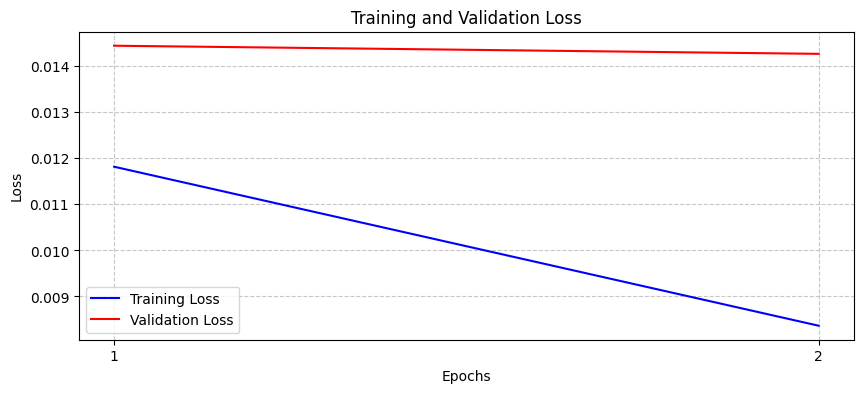

In [64]:
# Seguimiento del entrenamiento y overfitting
# ==============================================================================
forecaster.plot_history()

In [65]:
# Predicción
# ==============================================================================
predictions = forecaster.predict()
predictions

,pm2.5,co,no,o3
2021-04-01 00:00:00,5.566495,0.100783,0.275626,70.215904
2021-04-01 01:00:00,5.821085,0.099396,2.197662,65.982643
2021-04-01 02:00:00,6.577405,0.108273,0.454883,61.862934
2021-04-01 03:00:00,6.521583,0.093238,1.767507,60.256912
2021-04-01 04:00:00,5.874027,0.110710,0.822869,56.348724


In [66]:
# ------ También se puede predecir una serie y unos steps en particular ------ #
forecaster.predict(steps=[1, 5], levels="o3")

,o3
2021-04-01 00:00:00,70.215904
2021-04-01 04:00:00,56.348724


In [69]:
# Backtesting multiserie
# ==============================================================================
metrics, predictions = backtesting_forecaster_multiseries(
    forecaster=forecaster,
    steps=forecaster.steps,
    series=data_train_sel,
    levels=forecaster.levels,
    initial_train_size=int(len(data_train_sel) * 0.95),
    metric="mean_squared_error",
    verbose=False,
    refit=False,
)

Epoch 1/2
146/146 [==============================] - 7s 41ms/step - loss: 0.0073 - val_loss: 0.0129
Epoch 2/2
146/146 [==============================] - 6s 39ms/step - loss: 0.0062 - val_loss: 0.0121
Information of backtesting process
----------------------------------
Number of observations used for initial training: 18718
Number of observations used for backtesting: 986
    Number of folds: 198
    Number of steps per fold: 5
    Number of steps to exclude from the end of each train set before test (gap): 0
    Last fold only includes 1 observations.

Fold: 0
    Training:   2019-01-01 00:00:00 -- 2021-02-18 21:00:00  (n=18718)
    Validation: 2021-02-18 22:00:00 -- 2021-02-19 02:00:00  (n=5)
Fold: 1
    Training:   2019-01-01 00:00:00 -- 2021-02-18 21:00:00  (n=18718)
    Validation: 2021-02-19 03:00:00 -- 2021-02-19 07:00:00  (n=5)
Fold: 2
    Training:   2019-01-01 00:00:00 -- 2021-02-18 21:00:00  (n=18718)
    Validation: 2021-02-19 08:00:00 -- 2021-02-19 12:00:00  (n=5)
Fold: 3


100%|██████████| 198/198 [00:19<00:00, 10.23it/s]


In [70]:
# Métricas de error de backtesting
# ==============================================================================
metrics

,levels,mean_squared_error
0,pm2.5,51.804181
1,co,0.001026
2,no,41.286053
3,o3,973.783265


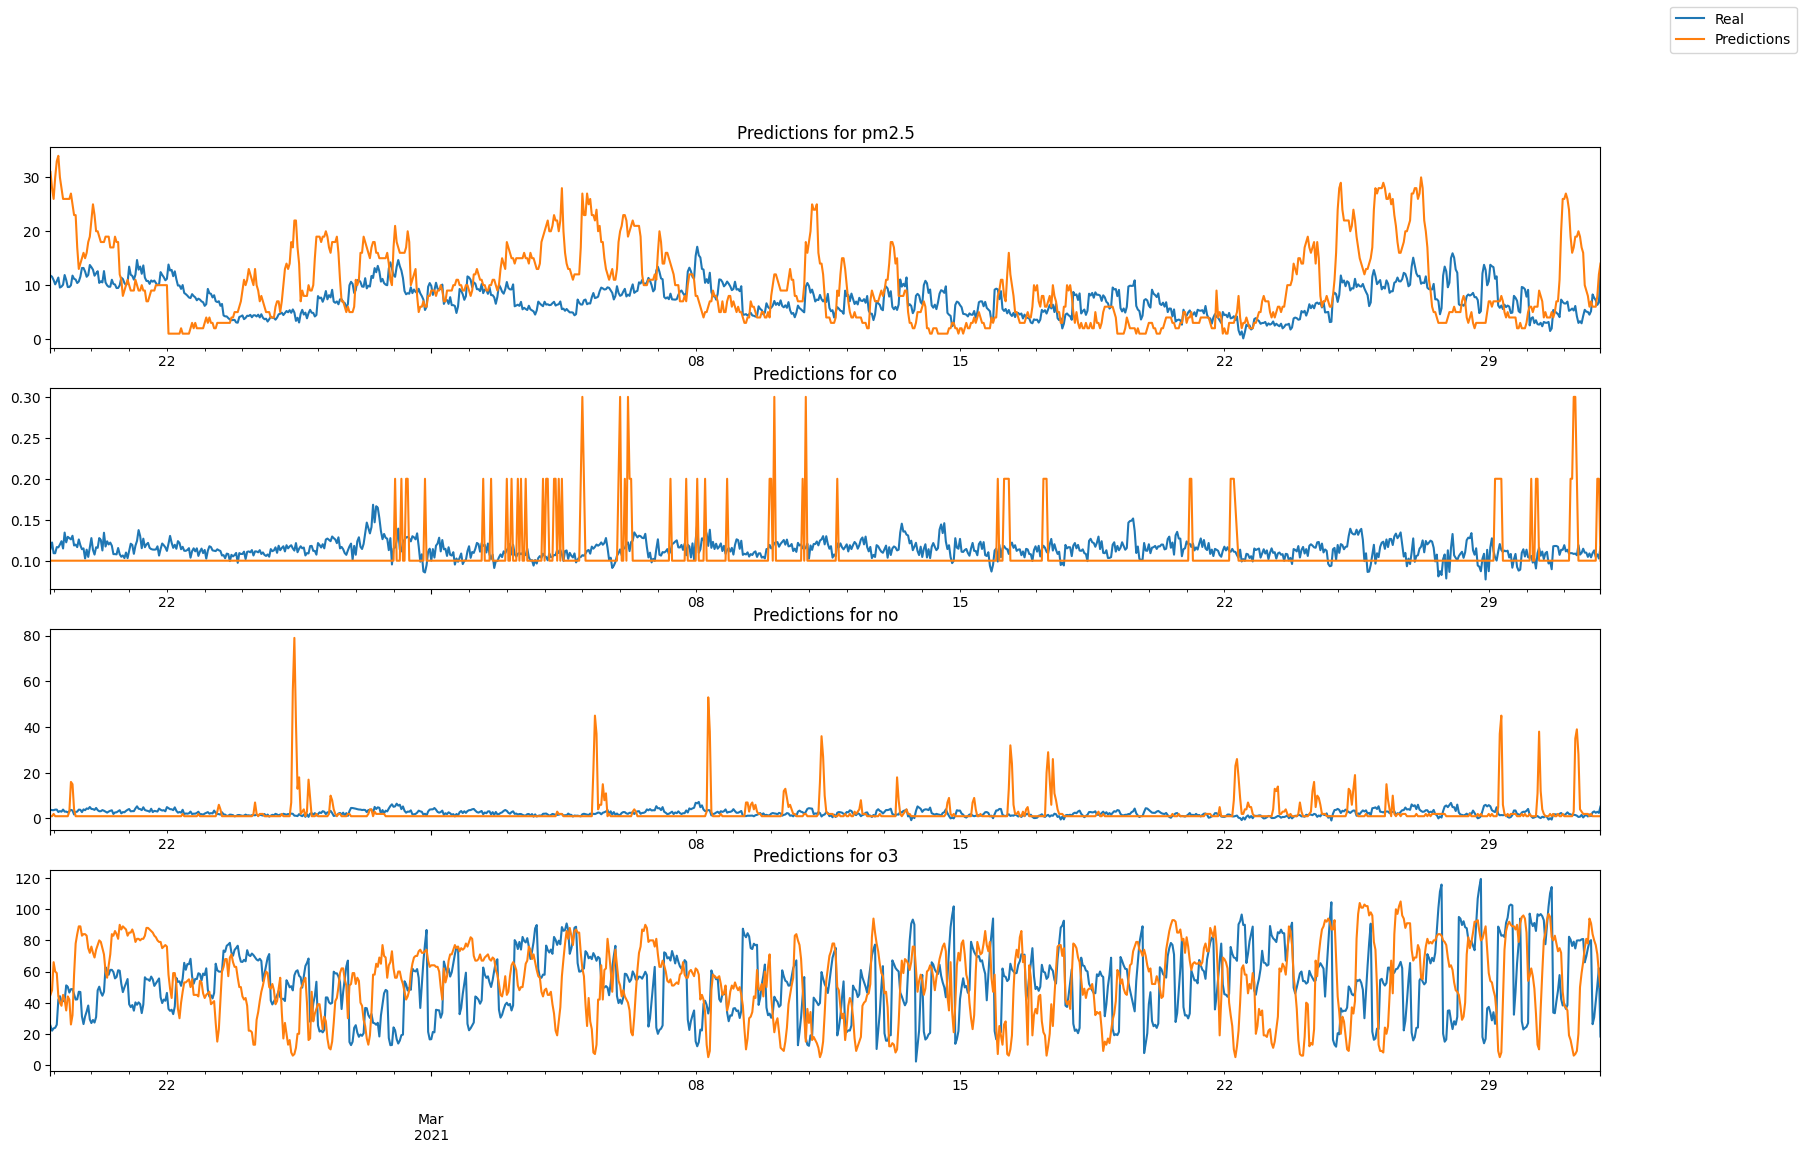

In [72]:
# Plot predictions
# =============================================================================
fig, ax = plt.subplots(nrows=len(levels), figsize=(20, 3*len(levels)))
for i, ll in enumerate(levels):
    ax[i].set_title(f"Predictions for {ll}")
    predictions[ll].plot(ax=ax[i])
    data_train_sel.loc[predictions.index, ll].plot(ax=ax[i])
fig.legend(["Real", "Predictions"])
plt.show()

## Conclusion

+ La potencia del deep learning va de la mano con altos requerimeintos computacionales.

+ Para conseguir un buen modelo de deep learning es necesario encontrar la arquitectura adecuada, lo que requiere de conocimiento y experiencia.

+ Cuantas más series se modelen, más fácil es que el modelo aprenda las relaciones entre las series pero puede perder precision en la predicción de cada una de ellas.

+ El uso de skforecast permite simplificar el proceso de modelado y acelerar el proceso de prototipado y desarrollo.


In [73]:
import session_info

session_info.show(html=False)

-----
keras               2.13.1
matplotlib          3.7.3
pandas              2.0.3
session_info        1.0.0
skforecast          0.11.0
sklearn             1.3.0
-----
IPython             8.15.0
jupyter_client      8.3.1
jupyter_core        5.3.1
-----
Python 3.11.5 (main, Sep 11 2023, 08:19:27) [Clang 14.0.6 ]
macOS-10.16-x86_64-i386-64bit
-----
Session information updated at 2023-11-27 21:34


## Bibliografía
<br>

- https://d2l.ai
- https://www.codificandobits.com/blog/redes-neuronales-recurrentes-explicacion-detallada/



In [74]:
%%html
<style>
.text_cell_render p {
    text-align: justify;
    font-family: 'Open Sans','Helvetica Neue',Helvetica,Arial,sans-serif;
    line-height: 1.5;
    font-weight: 400;
    text-shadow: none;
    color: #333333;
    text-rendering: optimizeLegibility;
    letter-spacing: +0.1px;
    margin-bottom: 1.15rem;
    font-size: 1.15em
}

div.admonition.note {
    text-align: justify;
    font-family: 'Open Sans','Helvetica Neue',Helvetica,Arial,sans-serif;
    line-height: 1.5;
    font-weight: 400;
    text-shadow: none;
    color: #333333;
    text-rendering: optimizeLegibility;
    letter-spacing: +0.1px;
    margin-bottom: 1.15rem;
    font-size: 15px;
}


#notebook-container {
    background-color: #fcfcfc;
}

div.inner_cell {
    margin-right: 5%;
}

.output_png {
        display: table-cell;
        text-align: center;
        vertical-align: middle;
}

.rendered_html code {
    background-color: #f2f2f2;
    font-family: monospace;
    color: #a20505;
    font-size: 15px;
    padding: 1px 1px;
    border: solid;
    border-color: darkgray;
    border-width: thin;
}

.rendered_html h1 {
    padding-top: 50px;
}

.rendered_html h2 {
    font-size: 30px;
    margin-top: 0;
    font-size: 2.488em;
}

.rendered_html h3 {
    font-size: 25px;
}

.rendered_html h4 {
    font-size: 20px;
}

</style>

**¿Cómo citar este documento?**

<p style="text-align:left"><font size="3" color="#555">
TITULO DEL DOCUMENTO by AUTOR, available under a Attribution 4.0 International (CC BY 4.0) at https://www.cienciadedatos.net/documentos/pystats05-correlacion-lineal-python.html

    
</font></p>

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work by AUTOR is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.